# 얼굴 인식을 통한 사진 분류
    최초 작성일 : 20/03/01
    작성자 : 양희승

    작성내용 : 기본 사이즈 변경
               얼굴 인식으로 사진 분류
               얼굴 크롭해서 저장

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def resizer(img):
    h, w, c = img.shape
    
    if h == 60 :
        re_img = img
    else :
        tmp = 60/h
        re_img = cv.resize(img, dsize=(0, 0), fx= tmp, fy= tmp, interpolation=cv.INTER_LINEAR)
        

    return re_img

In [3]:
def photo_sorter(origin_img, file_name) :
    h, w, c = origin_img.shape

    if (h > 600) or (w > 600) :
        if h < w :
            tmp = round(600/w, 3)
        elif h > w :
            tmp = round(600/h, 3)
        else :
            tmp = round(600/h, 3)

        re_img = cv.resize(origin_img, dsize=(0, 0), fx= tmp, fy= tmp, interpolation=cv.INTER_LINEAR)
    else :
        re_img = origin_img
    
    gray = cv.cvtColor(re_img, cv.COLOR_BGR2GRAY) 
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    
    if len(faces) > 0 :
        for i in range(len(faces)):
            x, y, w, h = faces[i]
            crop_img = re_img[y:y+h, x:x+w]
            re_crop_img = resizer(crop_img)
            cv.imwrite("img/"+file_name+"_"+str(i)+".jpg", re_crop_img)
    else :
        pass

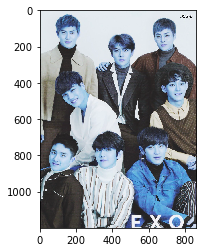

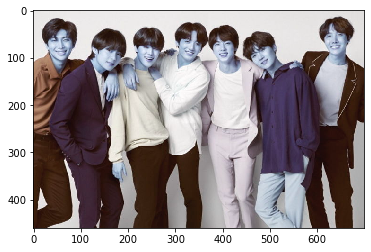

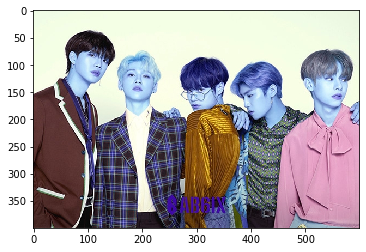

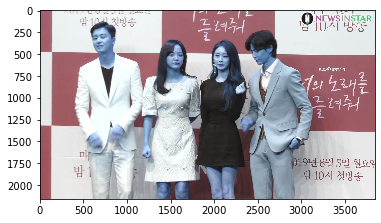

In [4]:
faceCascade = cv.CascadeClassifier('data/haarcascade_frontface.xml') 

for i in range(0, 4, 1) :
    file_name = "sorter_test"+str(i)
    img = cv.imread("img/"+file_name+".jpg")
#     plt.imshow(img)
#     plt.show()
    photo_sorter(img, file_name)    